<a href="https://colab.research.google.com/github/nicoRomeroCuruchet/BBB_DMP_MPU/blob/master/TP1/TP1_Robots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TP 1 - Cinemática

**Matrices de rotacion alrededor de X-Y-Z, respectivamente:**

$R_x(\phi) = \begin{bmatrix}
    1 & 0 & 0 \\
    0 & \cos(\phi) & -\sin(\phi) \\
    0 & \sin(\phi) & \cos(\phi) \\
\end{bmatrix}$,
$R_y(\theta) = \begin{bmatrix}
    \cos(\theta) & 0 & \sin(\theta) \\
    0 & 1 & 0 \\
    -\sin(\theta) & 0 & \cos(\theta) \\
\end{bmatrix}$ y $R_z(\psi) = \begin{bmatrix}
    \cos(\psi) & -\sin(\psi) & 0 \\
    \sin(\psi) & \cos(\psi) & 0 \\
    0 & 0 & 1 \\
\end{bmatrix}$

In [43]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Matrices de rotacion:
Rx = lambda phi: np.array([[1, 0, 0],
                           [0, np.cos(phi), -np.sin(phi)],
                            [0, np.sin(phi), np.cos(phi)]])

Ry = lambda theta: np.array([[np.cos(theta), 0, np.sin(theta)],
                             [0, 1, 0],
                              [-np.sin(theta), 0, np.cos(theta)]])

Rz = lambda psi: np.array([[np.cos(psi), -np.sin(psi), 0],
                           [np.sin(psi), np.cos(psi), 0],
                           [0, 0, 1]])

#### Ejercicio 1

Para el sistema de coordenadas canónico de un robot móvil (x: hacia adelante, y: hacia la
izquierda, z: hacia arriba) dibujar y resolver matemáticamente el sistema de coordenadas resultante luego
de aplicar las rotaciones dadas.

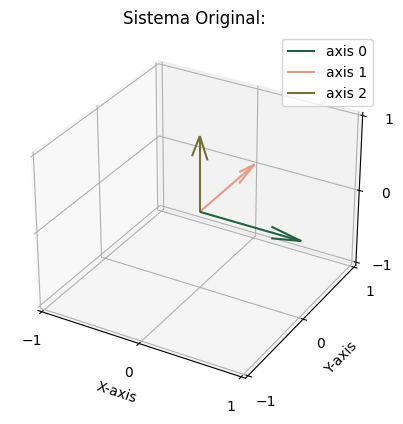

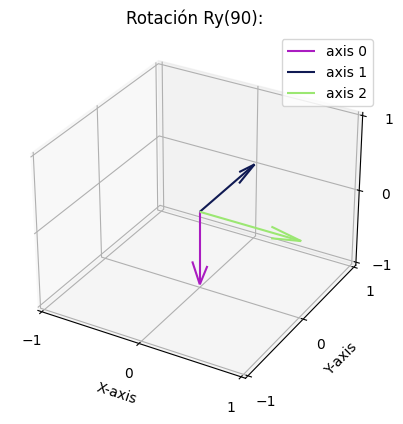

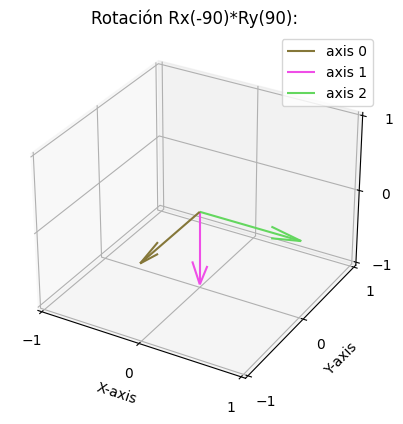

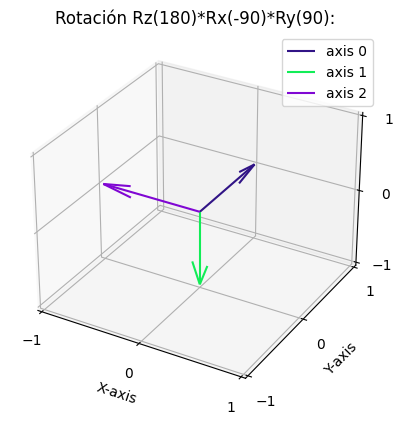

In [44]:
phi   = -np.pi/2   # Rotation angle about X-axis
theta = np.pi/2    # Rotation angle about Y-axis
psi   = np.pi      # Rotation angle about Z-axis

system_to_rotate = np.array([[1,0,0], [0,1,0], [0,0,1]])

axis_rotations = [[[1,0,0],[0,1,0], [0,0,1]],[list(v) for v in list(np.round(Ry(theta).dot(system_to_rotate).T,2))],
                  [list(v) for v in list(np.round(Rx(phi).dot(Ry(theta).dot(system_to_rotate)).T,2))],
                  [list(v) for v in list(np.round(Rz(psi).dot(Rx(phi).dot(Ry(theta).dot(system_to_rotate))).T,2))]]


titles = ['Sistema Original:', 'Rotación Ry(90):', 'Rotación Rx(-90)*Ry(90):', 'Rotación Rz(180)*Rx(-90)*Ry(90):']

for i, vectors in enumerate(axis_rotations):
    # Create a figure and a 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.locator_params(nbins=2)

    # Define the origin (0, 0, 0)
    origin = [0, 0, 0]
    # Plot each vector as a line from the origin
    for vector in vectors:
        ax.quiver(*origin, *vector, color=np.random.rand(3,), label=f'axis {vectors.index(vector)}')

    # Set axis limits
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)

    # Label the axes
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    plt.title(titles[i])

    # Add a legend
    ax.legend()

    # Show the 3D plot
    plt.show()


#### Ejercicio 2

Dada los siguientes ángulos de Euler (α = 4π/7, β =π/2, γ = −π/3),con órden xyz (primero rotación en x, luego en y y finalmente en z). Se pide:

a) Calcular la matríz de Rotación resultante R = Rx(α)Ry(β)Rz(γ).


In [45]:
# Definimos los ángulos como variables simbólicas
alpha, beta, gamma = sp.symbols('alpha beta gamma')

#alpha = 4*np.pi/7
#beta = np.pi/2
#gamma = -np.pi / 3

# Define the rotation matrices for each axis
R_x = sp.Matrix([[1, 0, 0],
               [0, sp.cos(alpha), -sp.sin(alpha)],
               [0, sp.sin(alpha), sp.cos(alpha)]])

R_y = sp.Matrix([[sp.cos(beta), 0, sp.sin(beta)],
               [0, 1, 0],
               [-sp.sin(beta), 0, sp.cos(beta)]])

R_z = sp.Matrix([[sp.cos(gamma), -sp.sin(gamma), 0],
               [sp.sin(gamma), sp.cos(gamma), 0],
               [0, 0, 1]])

print("Rotación resultante R = Rx(alpha)*Ry(beta)*Rz(gamma):\n")
R_x*R_y*R_z

Rotación resultante R = Rx(alpha)*Ry(beta)*Rz(gamma):



Matrix([
[                                   cos(beta)*cos(gamma),                                    -sin(gamma)*cos(beta),             sin(beta)],
[sin(alpha)*sin(beta)*cos(gamma) + sin(gamma)*cos(alpha), -sin(alpha)*sin(beta)*sin(gamma) + cos(alpha)*cos(gamma), -sin(alpha)*cos(beta)],
[sin(alpha)*sin(gamma) - sin(beta)*cos(alpha)*cos(gamma),  sin(alpha)*cos(gamma) + sin(beta)*sin(gamma)*cos(alpha),  cos(alpha)*cos(beta)]])

b) Utilizando la matríz de rotación calculada R, extraer matemáticamente los Ángulos de Euler. Explique.

Referencia utilizada: https://en.wikipedia.org/wiki/Euler_angles#Classic_Euler_angles

In [46]:
# Obtiene los angulos de euler en la convencion xyx :
rotation_matrix_to_euler_angles = lambda R : np.array([np.arctan2(R[1][0], -R[2][0]),
                                                       np.arccos(R[0][0]),
                                                       np.arctan2(R[0][1], R[0][2])])

# Obtiene los angulos de Tait–Bryan en la convencion xyz:
rotation_matrix_to_tait_bryan_angles = lambda R : np.array([np.arctan2(R[1][2], -R[2][2]),
                                                       np.arcsin(R[0][2]),
                                                       np.arctan2(-R[0][1], R[0][0])])

# Angulos utilizados para construir R:
alpha   = 4*np.pi/7
beta    = np.pi/2
gamma   = -np.pi/3


# a) Rotacion resultante:
R = Rx(alpha).dot(Ry(beta).dot(Rz(gamma)))

# b) Obtiene los angulos de euler:
alpha, beta, gamma = rotation_matrix_to_euler_angles(R)
alpha2, beta2, gamma2 = rotation_matrix_to_tait_bryan_angles(R)

print("\nEuler: xyx configuration:\n")
print("Alpha = ", alpha)
print("Beta = ", beta)
print("Gamma = ", gamma)

print("\nTait-Bryan: xyz configuration:\n")
print("Alpha = ", alpha2+np.pi)
print("Beta = ", beta2)
print("Gamma = ", gamma2)

tolerance = 1e-5
np.testing.assert_allclose(np.round(Rx(alpha).dot(Ry(beta).dot(Rx(gamma))),5),
                           np.round(R,5),
                           rtol=tolerance)

print("\n R From Euler angles: XYX:\n\n", np.round(Rx(alpha).dot(Ry(beta).dot(Rx(gamma))),5))
print("\n R From Tait–Bryan angles rotation: XYZ:\n\n", np.round(R,5))


Euler: xyx configuration:

Alpha =  0.7479982508547127
Beta =  1.5707963267948966
Gamma =  5.302876193624534e-17

Tait-Bryan: xyz configuration:

Alpha =  1.7951958020513101
Beta =  1.5707963267948966
Gamma =  -1.0471975511965976

 R From Euler angles: XYX:

 [[ 0.       0.       1.     ]
 [ 0.68017  0.73305 -0.     ]
 [-0.73305  0.68017  0.     ]]

 R From Tait–Bryan angles rotation: XYZ:

 [[ 0.       0.       1.     ]
 [ 0.68017  0.73305 -0.     ]
 [-0.73305  0.68017 -0.     ]]


#### Ejercicio 3

Dado el siguiente escenario,

* un robot A que encuentra en la posición (2, 3) con orientación 45◦ en coordenadas del mundo.
* un robot B que se encuentra en la posición (1, 1) con orientación −45◦ en el sistema de coordenadas del robot A.
* un punto w^p1 = (1, 5) en coordenadas del mundo.
* un punto A^p2 = (1, 2) en coordenadas del robot A.

a) Dibuje los robots y las poses y todos los sistemas de coordenadas presentes

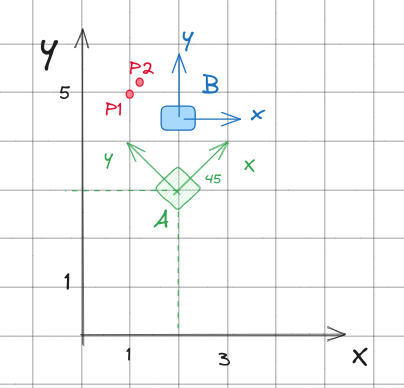

b) ¿Cuáles son los coordenadas del punto p1 en el sistema de coordenadas del robot A?

In [47]:
from numpy.linalg import inv
# w_p_1 = w_R_A * A_p_1 + w_t_A, donde w_R_A es la matriz de rotación y w_t_A el vector de traslación de A desde el marco de referencia global (ie, w_p_1 = R A_p_1 + t)
w_p_1   = np.array([1,5])
w_t_A   = np.array([2,3])
w_R_A = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],[np.sin(np.pi/4), np.cos(np.pi/4)]])
#Despejamos A_p_1, para tener a p1 desde las coordenadas del robot A:
A_p_1 = np.dot(inv(w_R_A), w_p_1-w_t_A)
print("p1 desde el frame del robot A:", A_p_1)

p1 desde el frame del robot A: [0.70710678 2.12132034]


c) ¿Cuáles son los coordenadas del punto A^p2 en el sistema de coordenadas del robot B?

In [48]:
from numpy.linalg import inv
# A_p_2 = A_R_B * B_p_1 + A_t_B, donde A_R_B es la matriz de rotación y A_t_B el vector de traslación de B desde el marco de referencia del robot A (ie, w_p_1 = R A_p_1 + t)
A_p_2   = np.array([1,2])
A_t_B   = np.array([1,1])
A_R_B = np.array([[np.cos(-np.pi/4), -np.sin(-np.pi/4)],[np.sin(-np.pi/4), np.cos(-np.pi/4)]])
#Despejamos B_p_2, para tener a p1 desde las coordenadas del robot A:
B_p_2 = np.dot(inv(A_R_B), A_p_2-A_t_B)
print("p2 desde el frame del robot B:", B_p_2)

p2 desde el frame del robot B: [-0.70710678  0.70710678]


d) ¿Cuál es la pose (posición y orientación) del robot B en coordenadas del Mundo?

In [49]:
w_R_B = np.dot(w_R_A,A_R_B)
w_t_B = np.dot(w_R_A,A_t_B)+w_t_A
#print(w_R_B)
print("posicion del robot B respecto del mundo:", w_t_B)
# El robot tiene orientacion 0 con respecto al mundo porque este esta girado
# -45 con respecto a A y este estaba girado en 45 con respecto al mundo:
print("orientacion del robot B respecto del mundo:", 0)

posicion del robot B respecto del mundo: [2.         4.41421356]
orientacion del robot B respecto del mundo: 0


#### Ejercicio 4:

Dada la pose del robot (Body) en el mundo: WξB. Si se tiene el camino (conjunto de poses C0ξCi con i = 1 . . . n) realizado por la cámara C (montada sobre el robot) en el marco de coordenadas de la cámara inicial C0. Sabiendo la transformación BξC


*   Procedimiento que hay que realizar para obtener el camino realizado por la cámara en el sistema de coordenadas del mundo:

 WξCi = WξB0 * BξC * C0ξCi     (con i = 1...n)


* Procedimiento que hay que realizar para obtener el camino realizado por el robot en el sistema de coordenadas del mundo

   WξBi = WξB0 * BξC * C0ξBi; C0ξBi = C0ξCi * inv(BξC) = C0ξCi * CξB (con i= 1...n)

* Realizar un gráfico ilustrativo donde se visualicen los sistemas de coordenadas, las transformaciones y los caminos realizados por el robot y la cámara:

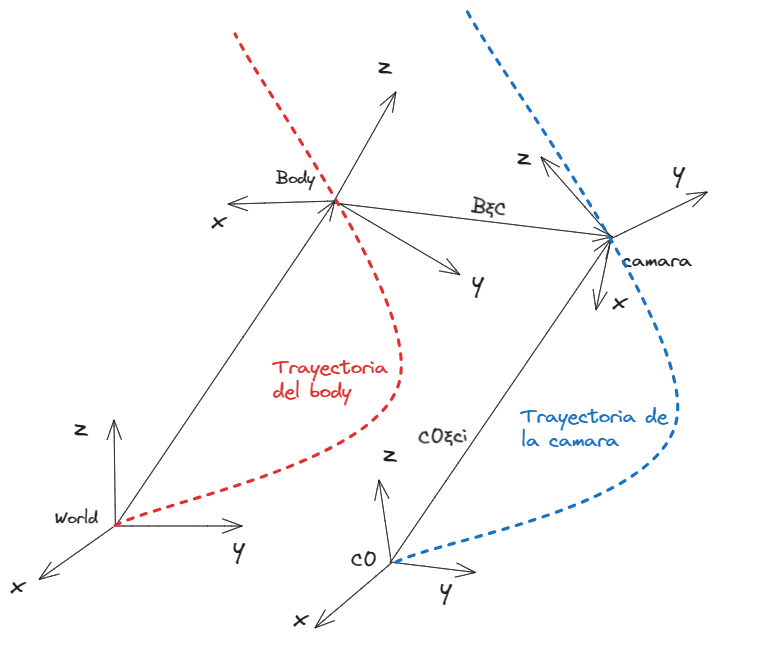

#### Ejercicio 5

Usamos el dataset de EuRoC, lo incorporamos directo desde la página

In [50]:
import requests
import zipfile
import os

# Set the URL of the .zip file you want to download
zip_url = "http://robotics.ethz.ch/~asl-datasets/ijrr_euroc_mav_dataset/machine_hall/MH_01_easy/MH_01_easy.zip"

# Download the .zip file
zip_filename = "MH_01_easy.zip"
response = requests.get(zip_url)

with open(zip_filename, 'wb') as zip_file:
    zip_file.write(response.content)

# Extract the contents of the .zip file in the current directory
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

Leemos las primeras 6 poses

In [51]:
import pandas as pd

file_path = "mav0/state_groundtruth_estimate0/data.csv"  # Replace with the actual path to your CSV file
raw = pd.read_csv(file_path, nrows=20000)
data = raw.values[:,:8]

#print(data)
# each row has [timestamp x y z qw qx qy qz ] of a pose. The first one is the original pose

Seteamos las transformaciones, obtenidas directamente del dataset

In [52]:
# Buscamos la transformada de las coordenadas de la IMU a las coordenadas de la cámara
import numpy as np
from numpy.linalg import inv

P = np.array([[0.0148655429818, -0.999880929698, 0.00414029679422, -0.0216401454975],
              [0.999557249008, 0.0149672133247, 0.025715529948, -0.064676986768],
              [-0.0257744366974, 0.00375618835797, 0.999660727178, 0.00981073058949],
              [0.0, 0.0, 0.0, 1.0]])
print("Matriz de transformacion de la camara a la IMU P:\n", P)
# P indica la orientación y la posición de la cámara izquierda desde el marco de referencia de la IMU (^{IMU}P_{camara})
#La transformada inversa indica la orientación y posición de la IMU desde el marco de referencia de la cámara
P_inv = inv(P)
print("\nMatriz de transformacion de la IMU a la camara:\n", P_inv)

Matriz de transformacion de la camara a la IMU P:
 [[ 0.01486554 -0.99988093  0.0041403  -0.02164015]
 [ 0.99955725  0.01496721  0.02571553 -0.06467699]
 [-0.02577444  0.00375619  0.99966073  0.00981073]
 [ 0.          0.          0.          1.        ]]

Matriz de transformacion de la IMU a la camara:
 [[ 0.01486554  0.99955725 -0.02577444  0.06522291]
 [-0.99988093  0.01496721  0.00375619 -0.02070639]
 [ 0.0041403   0.02571553  0.99966073 -0.0080546 ]
 [ 0.          0.          0.          1.        ]]


b -  pasar a segundos el timestamp, inicializando la cuenta en cero

In [53]:
# inicializamos a cero y pasamos de nanosegundos a segundos:
init = data[0,0]
for i in range(data.shape[0]):
    data[i,0] = (data[i,0]- init)*1e-9

a -  Transformamos los valores para tener las posiciones de la cámara

In [54]:
# Habría que ver cómo es la transformación, porque tenemos un eje de coordenadas (posición + rotación) visto de la imu,
# y hay que transformarlo a un eje de coordenadas visto desde la cámara
# Pasos:     armar R y t para cada posición (pasar de cuaterniones a R)
#            transformar R y t a las nuevas coordenadas
#            volver a pasar a x, y, z y cuaterniones desde lo obtenido, pero ahora visto desde la cámara.

from scipy.spatial.transform import Rotation as R

data_camera = np.zeros([data.shape[0],data.shape[1]])

for i in range(data.shape[0]):
    pose_data = R.from_quat([data[i,4],data[i,5],data[i,6],data[i,7]])
    r = pose_data.as_matrix()
    #print(r)

    pose = np.array([[r[0,0],r[0,1],r[0,2],data[i,1]],[r[1,0],r[1,1],r[1,2],data[i,2]],[r[2,0],r[2,1],r[2,2],data[i,3]],[0,0,0,1]])

    pose_camera = np.dot( P, pose )

    data_camera[i,0] = data [i,0]
    data_camera[i,1] = pose_camera[0,3]
    data_camera[i,2] = pose_camera[1,3]
    data_camera[i,3] = pose_camera[2,3]

    r2 = R.from_matrix(np.array([[pose_camera[0,0],pose_camera[0,1],pose_camera[0,2]],[pose_camera[1,0],pose_camera[1,1],pose_camera[1,2]],[pose_camera[2,0],pose_camera[2,1],pose_camera[2,2]]]))

    quat = r2.as_quat()
    #print(quat)
    data_camera[i,4] = quat[0]
    data_camera[i,5] = quat[1]
    data_camera[i,6] = quat[2]
    data_camera[i,7] = quat[2]

#print(data_camera)

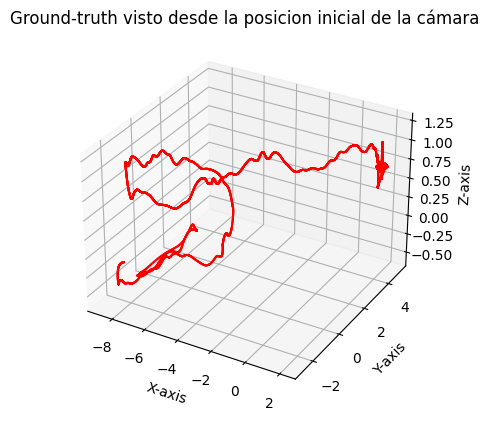

In [55]:
# Graficamos
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
# Make the grid
#ax1.scatter(data[:,1],data[:,2],data[:,3], c="blue",s=0.25)
ax1.scatter(data_camera[:,1],data_camera[:,2],data_camera[:,3], c="red",s=0.25)
# Label the axes
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
plt.title("Ground-truth visto desde la posicion inicial de la cámara")
plt.show()

Realizamos nuevamente el inciso a, pero con otro enfoque (aprovechando las propiedades de matrices para generar menos codigo)

In [56]:
new_data = (data[:,1:4]).T
new_data = np.insert(new_data, new_data.shape[0], np.ones((1,new_data.shape[1])), axis=0)
transformed_position = P.dot(new_data)

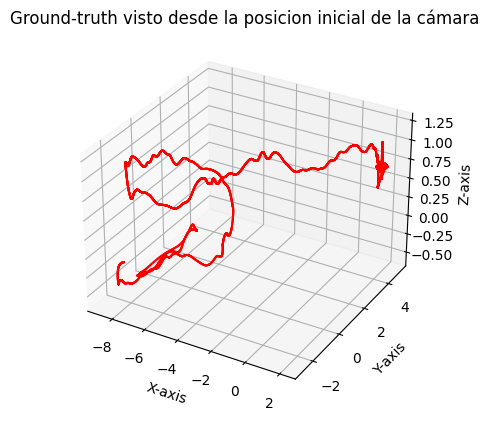

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
# Make the grid
ax1.scatter(transformed_position.T[:,0],transformed_position.T[:,1],transformed_position.T[:,2], c="red", s=0.25)

# Label the axes
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
plt.title("Ground-truth visto desde la posicion inicial de la cámara")
plt.show()

 c -  Queremos ahora la trayectoria ground-truth de la cámara vista desde la posición inicial de la IMU.

In [58]:
ls = list()
for i in range(data.shape[0]):

    pose_data = R.from_quat([data[i,4],data[i,5],data[i,6],data[i,7]])
    r = pose_data.as_matrix()

    X = np.array([data[i,1], data[i,2], data[i,3]]).T

    X_cam = X + np.dot(r, P[0:3,3])

    X_cam = [X_cam[0],X_cam[1],X_cam[2],1]
    ls.append(np.array(X_cam))

lstt=np.array(ls)

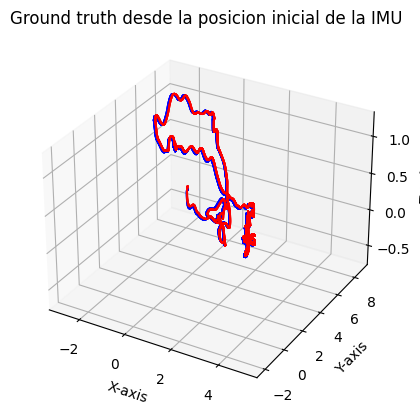

In [59]:
# Graficamos ambas trayectorias, vistas desde la posición inicial de la IMU
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
# Make the grid
ax1.scatter(data[:,1],data[:,2],data[:,3], c="blue",s=0.25)
ax1.scatter(lstt[:,0],lstt[:,1],lstt[:,2], c="red",s=0.25)
# Label the axes
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
plt.title("Ground truth desde la posicion inicial de la IMU")
plt.show()

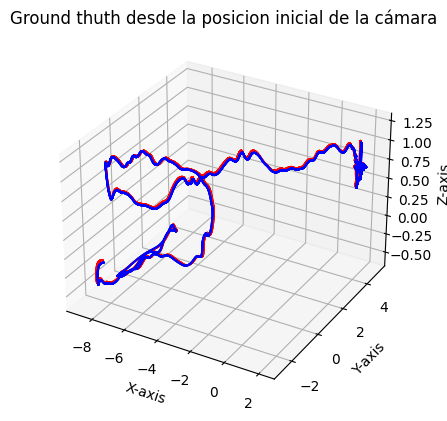

In [60]:
# Graficamos ambas trayectorias, vistas desde la posición inicial de la cámara
import matplotlib.pyplot as plt

lstt2 = P.dot(lstt.T).T
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
# Make the grid
ax1.scatter(data_camera[:,1],data_camera[:,2],data_camera[:,3], c="blue",s=0.25)
ax1.scatter(lstt2[:,0],lstt2[:,1],lstt2[:,2], c="red",s=0.25)
# Label the axes
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
plt.title("Ground thuth desde la posicion inicial de la cámara")
plt.show()